In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# hyperparameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 128
lr = 0.001

In [3]:
# dataset
train_dataset = torchvision.datasets.MNIST(root = "data/",
                                          train = True,
                                          transform = transforms.ToTensor(),
                                          download = False)

test_dataset = torchvision.datasets.MNIST(root = "data/",
                                          train = False,
                                          transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [4]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])


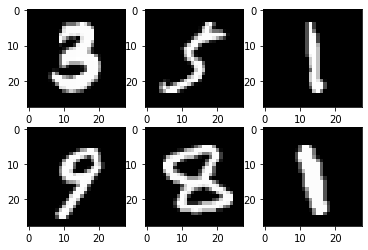

In [5]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap = "gray")
#plt.show()

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [7]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [9]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print("epoch {}/{}, step {}/{}, loss = {:.4f}".format(epoch+1,
                                                                 num_epochs,
                                                                 i+1,
                                                                 n_total_steps,
                                                                 loss))

epoch 1/2, step 100/469, loss = 0.4973
epoch 1/2, step 200/469, loss = 0.2561
epoch 1/2, step 300/469, loss = 0.3709
epoch 1/2, step 400/469, loss = 0.2213
epoch 2/2, step 100/469, loss = 0.1756
epoch 2/2, step 200/469, loss = 0.2331
epoch 2/2, step 300/469, loss = 0.1162
epoch 2/2, step 400/469, loss = 0.1762


In [13]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device) 
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs.data, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print("Accuracy = {}".format(acc))

Accuracy = 95.05
